In [2]:
import numpy as np
import tensorflow as tf
from sklearn import preprocessing

In [3]:
rawData = np.loadtxt('33_Audiobooks_data_Without_Headers.csv' , delimiter=',')
rawData

array([[9.9400e+02, 1.6200e+03, 1.6200e+03, ..., 5.0000e+00, 9.2000e+01,
        0.0000e+00],
       [1.1430e+03, 2.1600e+03, 2.1600e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0590e+03, 2.1600e+03, 2.1600e+03, ..., 0.0000e+00, 3.8800e+02,
        0.0000e+00],
       ...,
       [3.1134e+04, 2.1600e+03, 2.1600e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [3.2832e+04, 1.6200e+03, 1.6200e+03, ..., 0.0000e+00, 9.0000e+01,
        0.0000e+00],
       [2.5100e+02, 1.6740e+03, 3.3480e+03, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [4]:
rawInputs = rawData[ : , 1:-1 ] #از ستون 1 تا یکی مونده به اخر
rawTargets = rawData[ : , -1]#فقط ستون اخر

## Balance the dataset

In [5]:
numberOfOneTargets = int(np.sum(rawTargets))
numberOfZeroTargets = int( rawTargets.shape[0] - np.sum(rawTargets))
print( numberOfOneTargets , numberOfZeroTargets )

2237 11847


In [6]:
indexesToRemove = []
numberOfZeroTargets = 0

for i in range(rawTargets.shape[0]):
    if ( rawTargets[i] == 0):
        numberOfZeroTargets +=1
        if( numberOfZeroTargets > numberOfOneTargets):
            indexesToRemove.append(i)
            
print( 'zeros are : %s and we should remove %s indexes to balancing dataset'
      %(numberOfZeroTargets,len(indexesToRemove)))

zeros are : 11847 and we should remove 9610 indexes to balancing dataset


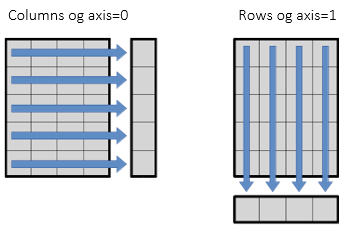

In [7]:
rawBalancedInputs = np.delete( rawInputs, indexesToRemove, axis=0)
rawBalancedTargets = np.delete( rawTargets , indexesToRemove , axis = 0 )

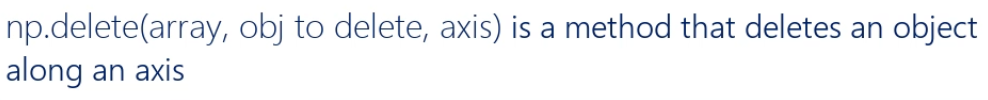

In [8]:
print( 'number of balanced inputs are : %s and number of targets are : %s'
      %( len(rawBalancedInputs) , len(rawBalancedTargets) ) )

number of balanced inputs are : 4474 and number of targets are : 4474


## Standardize the inputs

In [9]:
scaledInputs = preprocessing.scale(rawBalancedInputs)

## Shuffle the data


For integer arguments the function is equivalent to the Python built-in range function, but returns an ndarray rather than a list.



Example: np.arange(3)


Output: array([0, 1, 2])

In [11]:
# یک ارایه از ایندکس هایی به تعداد دیتاهای استاندارد شدمون میسازیم و اونو شافل میکنیم
# بعد از ارایه های تارگت و اینپوتمون اون اندیس های شافل شده رو برمیداریم

shuffledIndex = np.arange(scaledInputs.shape[0])

np.random.shuffle(shuffledIndex)
scaledInputs

shuffleInputs = scaledInputs[shuffledIndex]
shuffleTargets = rawBalancedTargets[shuffledIndex]

## Split the dataset into train, validation, and test
suming we want 80-10-10 distribution of training, validation, and test.

In [10]:
samplesCount = shuffleInputs.shape[0]

trainCount = int( 0.8 * samplesCount )
validationCount = int( 0.1 * samplesCount )
testCount = int( samplesCount - (trainCount + validationCount) )

print( 'sample count is %s and train count is %s and validation count is %s and test count is %s'
      % ( samplesCount, trainCount, validationCount, testCount) )

sample count is 4474 and train count is 3579 and validation count is 447 and test count is 448


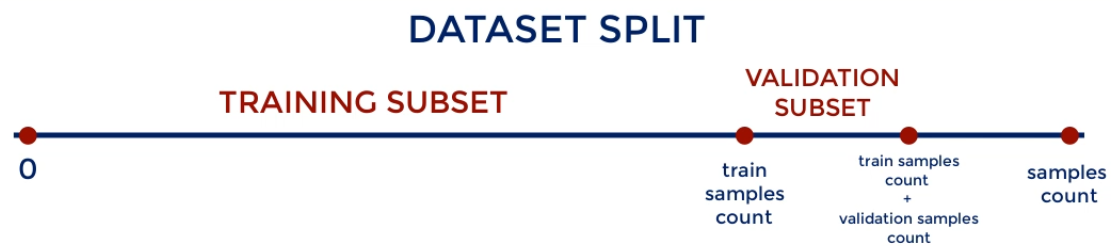

In [11]:
trainInputs = shuffleInputs[:trainCount]
trainTargets = shuffleTargets[:trainCount]

In [12]:
validationInputs = shuffleInputs[ trainCount : trainCount + validationCount ]
validationTargets = shuffleTargets[ trainCount : trainCount + validationCount ]

In [13]:
testInputs = shuffleInputs[ trainCount + validationCount : ]
testTargets = shuffleTargets[ trainCount + validationCount : ]

In [14]:
print( 'train target of one is %s train count is %s and %s percent is diffrent' 
      %(np.sum(trainTargets) , trainCount , round( (np.sum(trainTargets) / trainCount)*100 ,1)) )

print( 'validation target of one is %s validation count is %s and %s percent is diffrent' 
      %(np.sum(validationTargets) , validationCount , round( (np.sum(validationTargets) / validationCount)*100 ,1)) )

print( 'test target of one is %s test count is %s and %s percent is diffrent' 
      %(np.sum(testTargets) , testCount , round( (np.sum(testTargets) / testCount)*100 ,1)) )

train target of one is 1792.0 train count is 3579 and 50.1 percent is diffrent
validation target of one is 222.0 validation count is 447 and 49.7 percent is diffrent
test target of one is 223.0 test count is 448 and 49.8 percent is diffrent


## Save the three datasets in *.npz

In [15]:
np.savez('Audiobooks_data_train', inputs= trainInputs , targets= trainTargets )
np.savez('Audiobooks_data_validation', inputs= validationInputs , targets= validationTargets )
np.savez('Audiobooks_data_test', inputs= testInputs , targets= testTargets )

## Loading our Data from the npz files

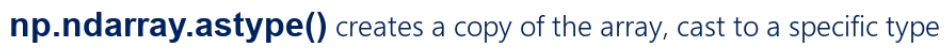

In [16]:
npzTrain = np.load('Audiobooks_data_train.npz')
trainInputs = npzTrain['inputs'].astype(float)
trainTargets = npzTrain['targets'].astype(int)

trainInputs.shape

(3579, 10)

targets must be int because of sparse_categorical_crossentropy (we want to be able to smoothly one-hot encode them)

In [17]:
npzValid = np.load('Audiobooks_data_validation.npz')
validInputs = npzValid['inputs'].astype(float)
validTargets = npzValid['targets'].astype(int)

In [18]:
npzTest = np.load('Audiobooks_data_test.npz')
testInputs = npzTest['inputs'].astype(float)
testTargets = npzTest['targets'].astype(int)

### Our Model

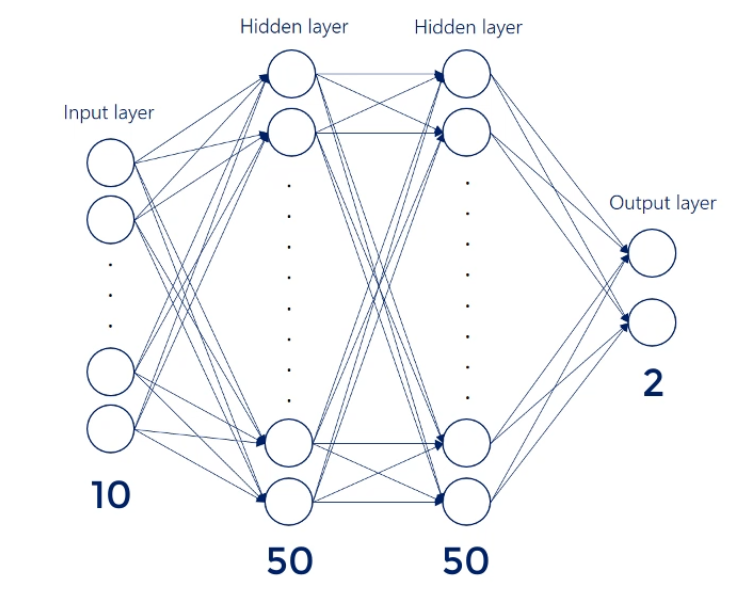

In [19]:
inputsSize = 10
outputSize = 2
hiddenLayer = 50

model = tf.keras.Sequential([
    tf.keras.layers.Dense( hiddenLayer , activation='relu' ),
    tf.keras.layers.Dense( hiddenLayer , activation='relu' ),
    tf.keras.layers.Dense( outputSize , activation='softmax' )
])

In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
epochSize = 100
batch_size =100

model.fit( trainInputs ,
           trainTargets ,
           batch_size=batch_size,
           epochs=epochSize ,
           validation_data=(validInputs, validTargets) ,
           verbose=2)

Epoch 1/100
36/36 - 1s - loss: 0.6496 - accuracy: 0.6158 - val_loss: 0.5413 - val_accuracy: 0.7562 - 738ms/epoch - 21ms/step
Epoch 2/100
36/36 - 0s - loss: 0.4940 - accuracy: 0.7505 - val_loss: 0.4626 - val_accuracy: 0.7293 - 63ms/epoch - 2ms/step
Epoch 3/100
36/36 - 0s - loss: 0.4334 - accuracy: 0.7762 - val_loss: 0.4214 - val_accuracy: 0.7763 - 61ms/epoch - 2ms/step
Epoch 4/100
36/36 - 0s - loss: 0.4012 - accuracy: 0.7874 - val_loss: 0.3950 - val_accuracy: 0.7763 - 61ms/epoch - 2ms/step
Epoch 5/100
36/36 - 0s - loss: 0.3819 - accuracy: 0.7994 - val_loss: 0.3806 - val_accuracy: 0.7987 - 67ms/epoch - 2ms/step
Epoch 6/100
36/36 - 0s - loss: 0.3693 - accuracy: 0.8008 - val_loss: 0.3663 - val_accuracy: 0.8143 - 60ms/epoch - 2ms/step
Epoch 7/100
36/36 - 0s - loss: 0.3615 - accuracy: 0.8055 - val_loss: 0.3647 - val_accuracy: 0.8031 - 64ms/epoch - 2ms/step
Epoch 8/100
36/36 - 0s - loss: 0.3533 - accuracy: 0.8117 - val_loss: 0.3540 - val_accuracy: 0.8121 - 61ms/epoch - 2ms/step
Epoch 9/100
36

Epoch 68/100
36/36 - 0s - loss: 0.3108 - accuracy: 0.8259 - val_loss: 0.3329 - val_accuracy: 0.8054 - 61ms/epoch - 2ms/step
Epoch 69/100
36/36 - 0s - loss: 0.3106 - accuracy: 0.8326 - val_loss: 0.3115 - val_accuracy: 0.8054 - 61ms/epoch - 2ms/step
Epoch 70/100
36/36 - 0s - loss: 0.3106 - accuracy: 0.8262 - val_loss: 0.3150 - val_accuracy: 0.8345 - 61ms/epoch - 2ms/step
Epoch 71/100
36/36 - 0s - loss: 0.3129 - accuracy: 0.8279 - val_loss: 0.3121 - val_accuracy: 0.8412 - 62ms/epoch - 2ms/step
Epoch 72/100
36/36 - 0s - loss: 0.3127 - accuracy: 0.8248 - val_loss: 0.3208 - val_accuracy: 0.7987 - 58ms/epoch - 2ms/step
Epoch 73/100
36/36 - 0s - loss: 0.3095 - accuracy: 0.8268 - val_loss: 0.3236 - val_accuracy: 0.8098 - 61ms/epoch - 2ms/step
Epoch 74/100
36/36 - 0s - loss: 0.3071 - accuracy: 0.8329 - val_loss: 0.3132 - val_accuracy: 0.8300 - 60ms/epoch - 2ms/step
Epoch 75/100
36/36 - 0s - loss: 0.3101 - accuracy: 0.8284 - val_loss: 0.3180 - val_accuracy: 0.8121 - 59ms/epoch - 2ms/step
Epoch 76

sometimes our validation loss increase. So, we are overfitting. Therefore, we should use the early stopping mechanism.


callbacks are functions called by a task when a task is completed. The task here is to check if val_loss is increasing

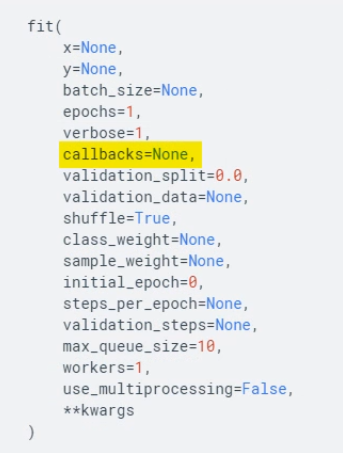

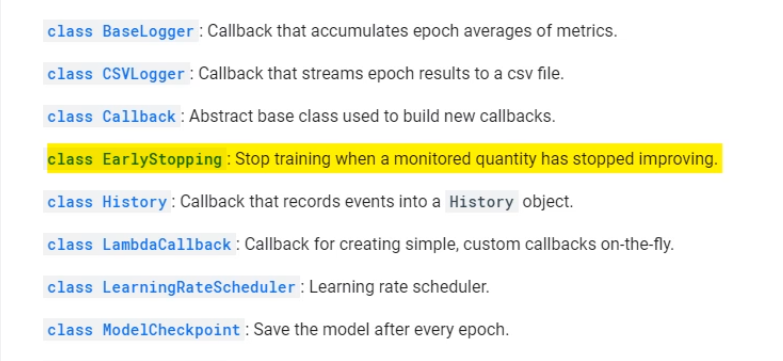

In [22]:
early_stopping = tf.keras.callbacks.EarlyStopping()

In [23]:
model.fit( trainInputs ,
           trainTargets ,
           batch_size=batch_size,
           epochs=epochSize ,
           validation_data=(validInputs, validTargets) ,
           verbose=2,
           callbacks=[early_stopping]
         )

Epoch 1/100
36/36 - 0s - loss: 0.3058 - accuracy: 0.8265 - val_loss: 0.3109 - val_accuracy: 0.8233 - 90ms/epoch - 2ms/step
Epoch 2/100
36/36 - 0s - loss: 0.3040 - accuracy: 0.8374 - val_loss: 0.3240 - val_accuracy: 0.8009 - 63ms/epoch - 2ms/step


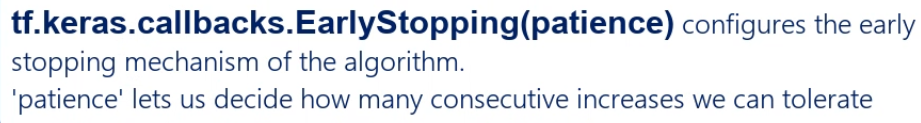

In [24]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5)
model.fit( trainInputs ,
           trainTargets ,
           batch_size=batch_size,
           epochs=epochSize ,
           validation_data=(validInputs, validTargets) ,
           verbose=2,
           callbacks=[early_stopping]
         )

Epoch 1/100
36/36 - 0s - loss: 0.3059 - accuracy: 0.8298 - val_loss: 0.3114 - val_accuracy: 0.8076 - 103ms/epoch - 3ms/step
Epoch 2/100
36/36 - 0s - loss: 0.3043 - accuracy: 0.8324 - val_loss: 0.3235 - val_accuracy: 0.8054 - 64ms/epoch - 2ms/step
Epoch 3/100
36/36 - 0s - loss: 0.3071 - accuracy: 0.8340 - val_loss: 0.3152 - val_accuracy: 0.8031 - 63ms/epoch - 2ms/step
Epoch 4/100
36/36 - 0s - loss: 0.3039 - accuracy: 0.8324 - val_loss: 0.3223 - val_accuracy: 0.8054 - 60ms/epoch - 2ms/step
Epoch 5/100
36/36 - 0s - loss: 0.3054 - accuracy: 0.8293 - val_loss: 0.3136 - val_accuracy: 0.8210 - 62ms/epoch - 2ms/step
Epoch 6/100
36/36 - 0s - loss: 0.3022 - accuracy: 0.8318 - val_loss: 0.3199 - val_accuracy: 0.8009 - 62ms/epoch - 2ms/step


## Test the model

As we discussed in the lectures, after training on the training data and validating on the validation data, we test the final prediction power of our model by running it on the test dataset that the algorithm has NEVER seen before.


It is very important to realize that fiddling with the hyperparameters overfits the validation dataset.


The test is the absolute final instance. You should not test before you are completely done with adjusting your model.


If you adjust your model after testing, you will start overfitting the test dataset, which will defeat its purpose.

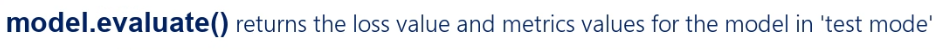

In [25]:
testLoss , testAccuracy = model.evaluate(testInputs,testTargets)
print('Test loss of our model is: {0:.2f}. And our Test accuracy is: {1:.2f}%'.format(testLoss, testAccuracy*100.))

14/14 [==============================] - 0s 1ms/step - loss: 0.3012 - accuracy: 0.8348
Test loss of our model is: 0.30. And our Test accuracy is: 83.48%


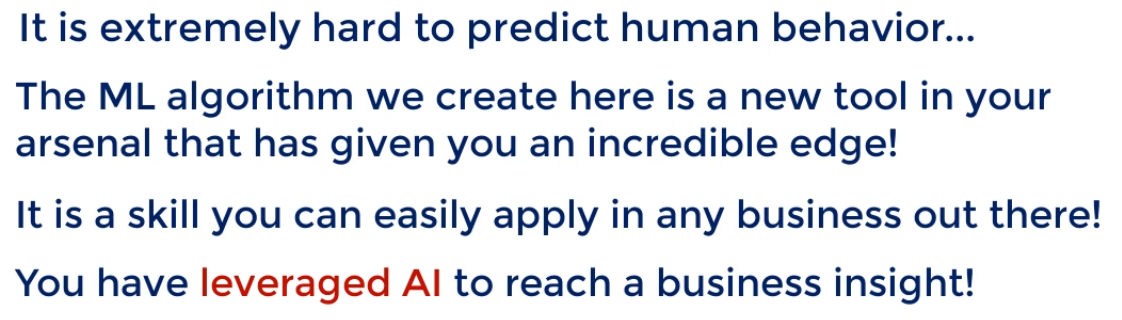